In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("/content/Admission_Predict.csv")
df = df.iloc[:,1:]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
corr_matrix = df.corr()
corr_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


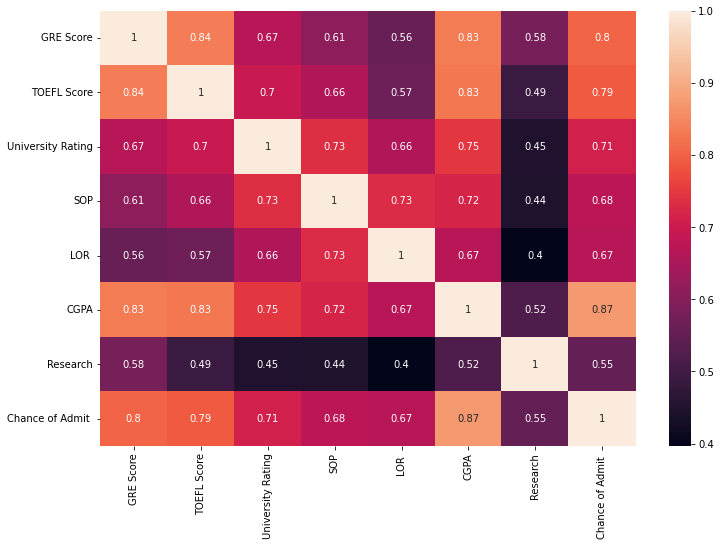

In [4]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.show()

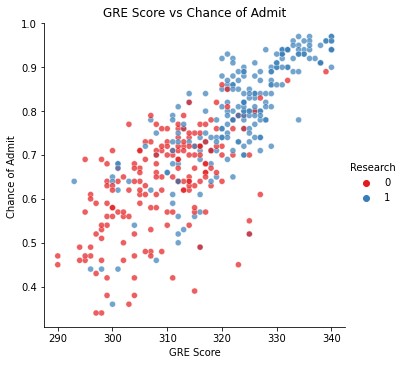

In [5]:
#plotting data which have high correlation

sns.relplot(data=df,x="GRE Score",y="Chance of Admit ",hue="Research",
            palette="Set1",alpha=0.7)
plt.title("GRE Score vs Chance of Admit")
plt.show()

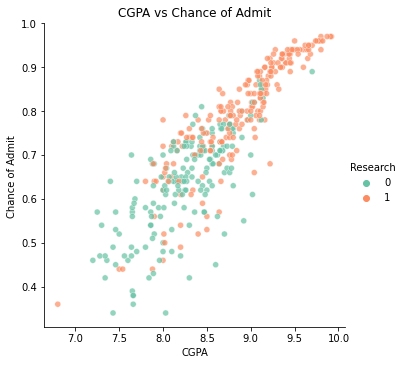

In [6]:
sns.relplot(data=df,x="CGPA",y="Chance of Admit ",hue="Research",
            palette="Set2",alpha=0.7)
plt.title("CGPA vs Chance of Admit")
plt.show()

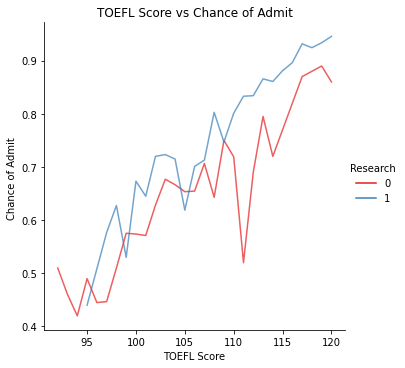

In [7]:
sns.relplot(data=df,x="TOEFL Score",y="Chance of Admit ",hue="Research",
            palette="Set1",alpha=0.7,kind="line",ci=None)
plt.title("TOEFL Score vs Chance of Admit")
plt.show()

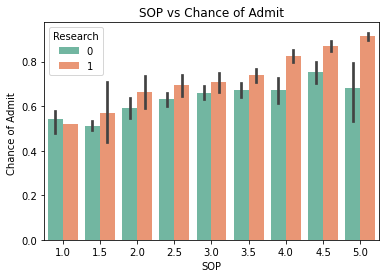

In [8]:
sns.barplot(data=df,x="SOP",y="Chance of Admit ",
            palette="Set2",hue="Research")
plt.title("SOP vs Chance of Admit")
plt.show()

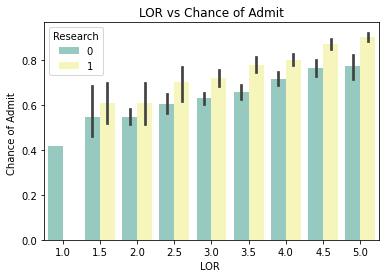

In [9]:
sns.barplot(data=df,x="LOR ",y="Chance of Admit ",
            palette="Set3",hue="Research")
plt.title("LOR vs Chance of Admit")
plt.show()

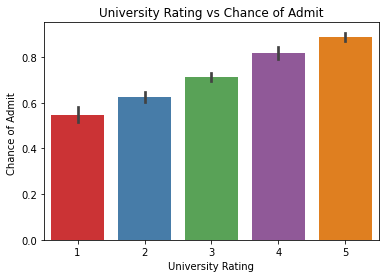

In [10]:
sns.barplot(data=df,x="University Rating",y="Chance of Admit ",
            palette="Set1")
plt.title("University Rating vs Chance of Admit")
plt.show()

It was said that there are direct proportions between the columns and "Chance of Admit" data. Also, when observing the graphs, there are linear relationships between them. Therefore, using Linear Regression method may be suitable on the data, but since "Chance of Admit" data depends on more than one varible, it is more appropriate to imply Multiple Linear Regression method instead of Linear Regression method.

Importing the required libraries for regression analyzes

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

Spliting the dataset into training and testing **data**

In [12]:
x = df[["GRE Score","TOEFL Score","University Rating","SOP","LOR ","CGPA"]]
y = df["Chance of Admit "].values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

MULTIPLE LINEAR REGRESSION

In [13]:
#implying multiple linear regression and determining its score

multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(x_train,y_train)

y_pred_mlr = multiple_lin_reg.predict(x_test)

r2_score_mlr = r2_score(y_test,y_pred_mlr)
print("Mutiple Linear Regression's Score = {:.3f}".format(r2_score_mlr))

Mutiple Linear Regression's Score = 0.815


DECISION TREE REGRESSION

In [14]:
#implying decision tree regression and determining its score

tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

y_pred_tree = tree_reg.predict(x_test)

r2_score_tree = r2_score(y_test,y_pred_tree)
print("Decision Tree Regression's Score = {:.3f}".format(r2_score_tree))

Decision Tree Regression's Score = 0.643


RANDOM FOREST REGRESSION

In [15]:
#implying random forest regression and determining its score

ran_for_reg = RandomForestRegressor(n_estimators=100,random_state=42)
ran_for_reg.fit(x_train,y_train)

y_pred_rfr = ran_for_reg.predict(x_test)

r2_score_rfr = r2_score(y_test,y_pred_rfr)
print("Random Forest Regression's Score = {:.3f}".format(r2_score_rfr))

Random Forest Regression's Score = 0.804


In [17]:
#Descriptive Statistics
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [18]:
df.skew()

GRE Score           -0.062893
TOEFL Score          0.057216
University Rating    0.171260
SOP                 -0.275761
LOR                 -0.106991
CGPA                -0.065991
Research            -0.191582
Chance of Admit     -0.353448
dtype: float64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [20]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

KeyError: ignored

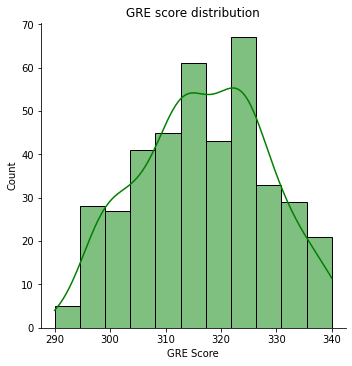

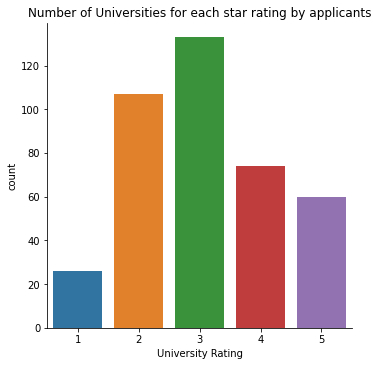

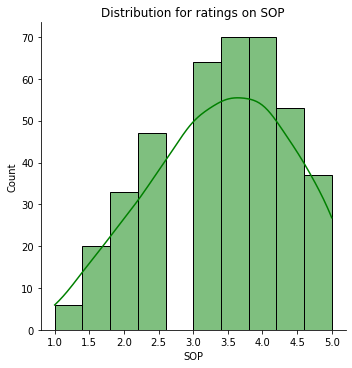

In [22]:
sns.displot(x=df["GRE Score"], kde=True, color='green')
plt.title("GRE score distribution");
sns.displot(x=df["TOEFL Score"], kde=True, color='purple')
plt.title("TOEFL score distribution");
sns.countplot(x=df["University Rating"]);
plt.title("Number of Universities for each star rating by applicants");
sns.displot(x=df["SOP"], kde=True, color='green');
plt.title("Distribution for ratings on SOP");
sns.displot(x=df["LOR"], kde=True, color='purple');
plt.title("Letter of recommendation of applicants Distribution");
sns.displot(x=df["CGPA"], kde=True, color='green');
plt.title("Distribution of CGPA Score");
sns.countplot(x=df["Research"]);
plt.title("Research Count");

In [24]:
cols = df.columns
features = [i for i in df.columns if i != 'Chance of Admit']
label = 'Chance of Admit'
features

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

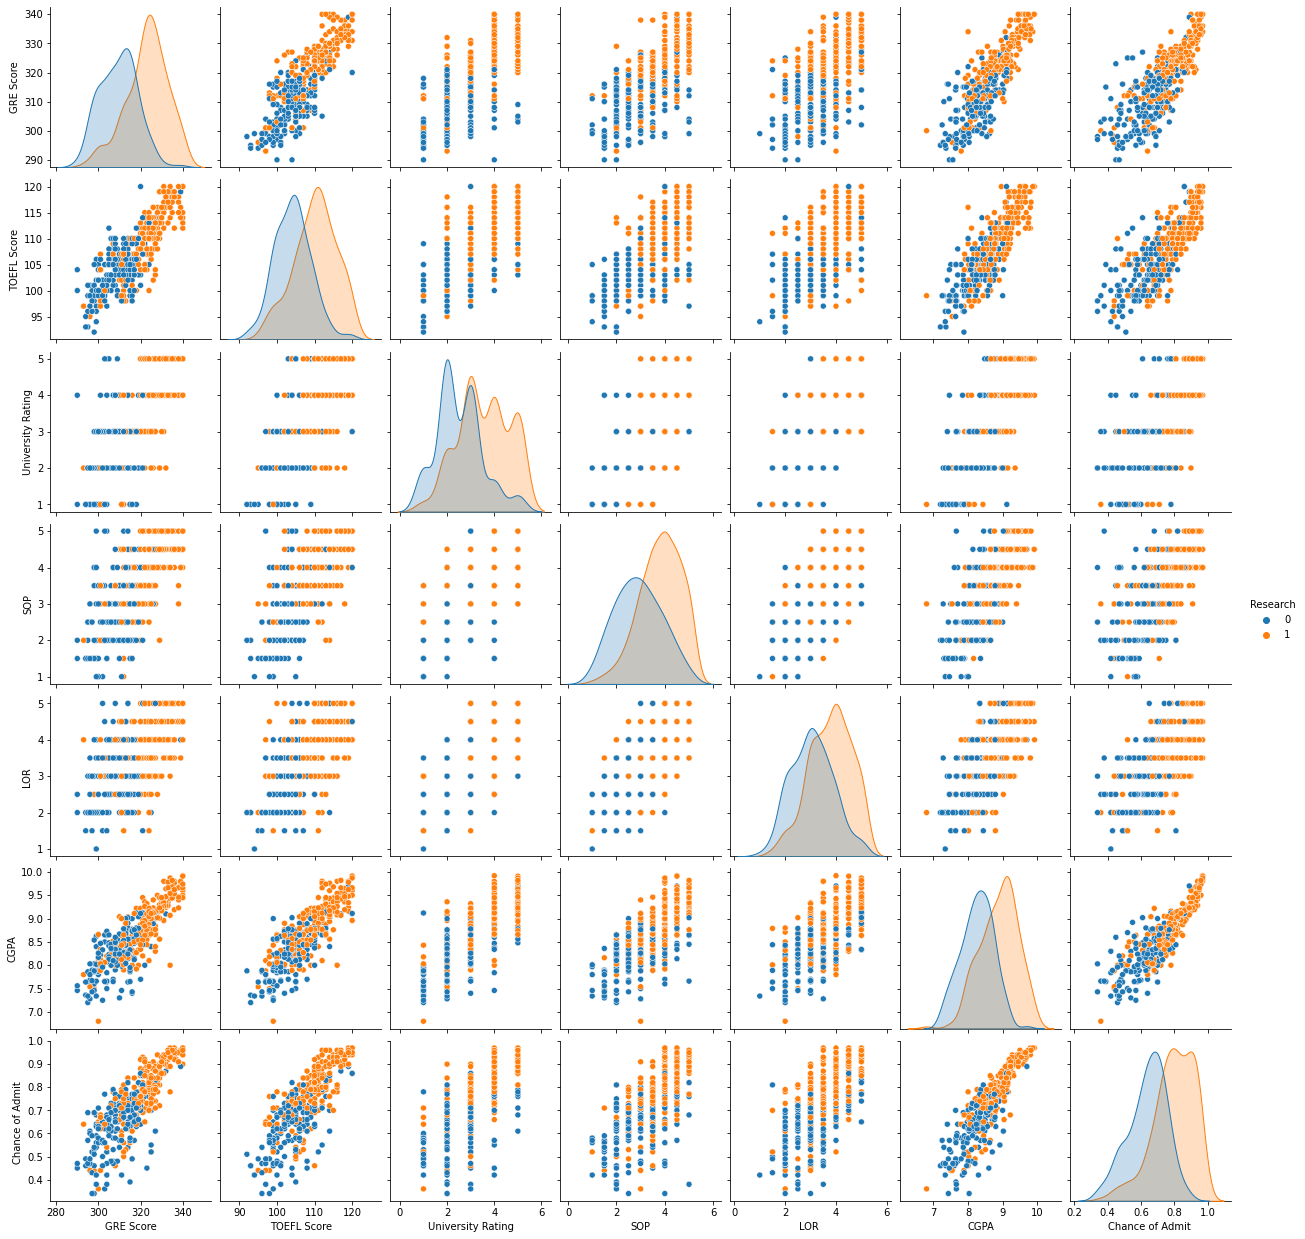

In [27]:
sns.pairplot(df,hue='Research')

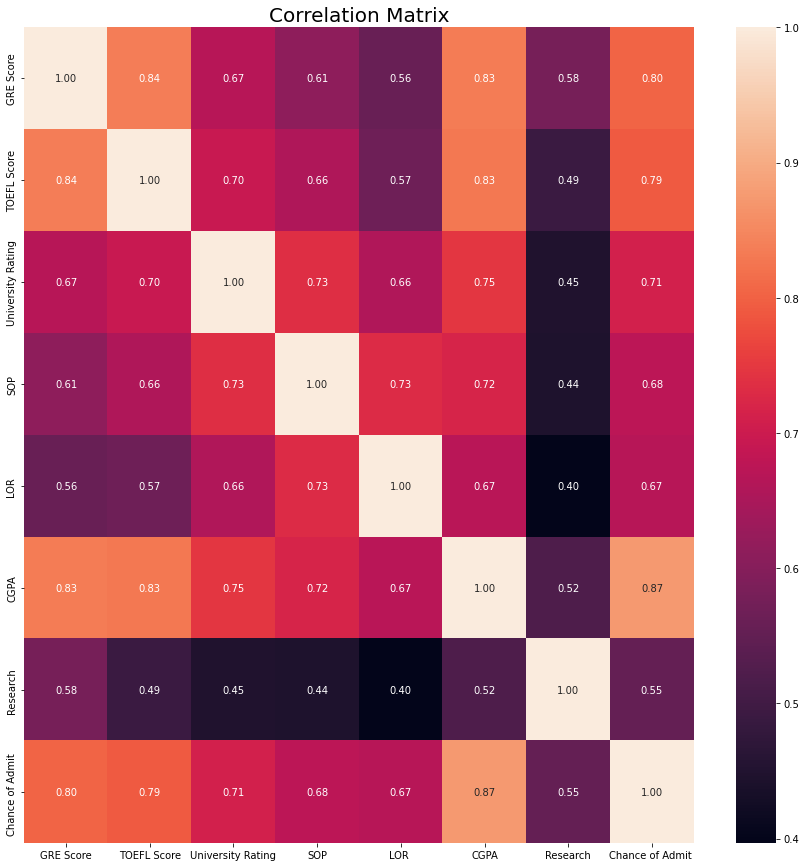

In [28]:
orr_matrix = df.corr()
plt.figure(figsize = (15, 15))
sns.heatmap(corr_matrix,annot=True,fmt='0.2f')
plt.title("Correlation Matrix", fontsize = 20)
plt.show()